In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
df_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Drop Unnecessary Columns
df_train = df_train.drop(columns=["MachineID"])
df_test_id = df_test["MachineID"] 
df_test = df_test.drop(columns=["MachineID"])

# Separate Target
y_train = df_train["target"]
X_train  = df_train.drop(columns=["target"])


In [2]:
df_train.shape

(100000, 75)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

In [5]:
df_test.shape

(10000, 74)

In [6]:
df_train.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion',
       'IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'PlatformType', 'Processor',
       'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OsPlatformSubRelease',
       'OSBuildLab', 'SKUEditionName', 'IsSystemProtected',
       'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily',
       'OEMNameID', 'OEMModelID', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB',
       'PrimaryDiskType', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', '

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ProductName                         100000 non-null  object 
 1   EngineVersion                       100000 non-null  object 
 2   AppVersion                          100000 non-null  object 
 3   SignatureVersion                    100000 non-null  object 
 4   IsBetaUser                          100000 non-null  int64  
 5   RealTimeProtectionState             99934 non-null   float64
 6   IsPassiveModeEnabled                100000 non-null  int64  
 7   AntivirusConfigID                   99924 non-null   float64
 8   NumAntivirusProductsInstalled       99924 non-null   float64
 9   NumAntivirusProductsEnabled         99924 non-null   float64
 10  HasTpm                              100000 non-null  int64  
 11  CountryID                  

# Data Cleaning and EDA

In [8]:
df_train.isnull().sum()

ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
IsBetaUser            0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 75, dtype: int64

In [9]:
num_train_ = df_train.select_dtypes(include=['int64','float64'])
num_test_ = df_test.select_dtypes(include=['int64','float64'])

In [10]:
num_train_less_2 = num_train_.nunique()[num_train_.nunique() < 3].index.tolist()
num_test_less_2 = num_test_.nunique()[num_test_.nunique() < 3].index.tolist()

In [11]:
#fill null or nan in num_train_less_2 with mode
for col in num_train_less_2:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

for col in num_test_less_2:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

<ipython-input-11-b60f838716d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
<ipython-input-11-b60f838716d1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [12]:
df_train[num_train_less_2].isnull().sum()

IsBetaUser                          0
IsPassiveModeEnabled                0
HasTpm                              0
IsSystemProtected                   0
AutoSampleSubmissionEnabled         0
SMode                               0
FirewallEnabled                     0
HasOpticalDiskDrive                 0
IsPortableOS                        0
IsFlightsDisabled                   0
IsSecureBootEnabled                 0
IsVirtualDevice                     0
IsTouchEnabled                      0
IsPenCapable                        0
IsAlwaysOnAlwaysConnectedCapable    0
IsGamer                             0
target                              0
dtype: int64

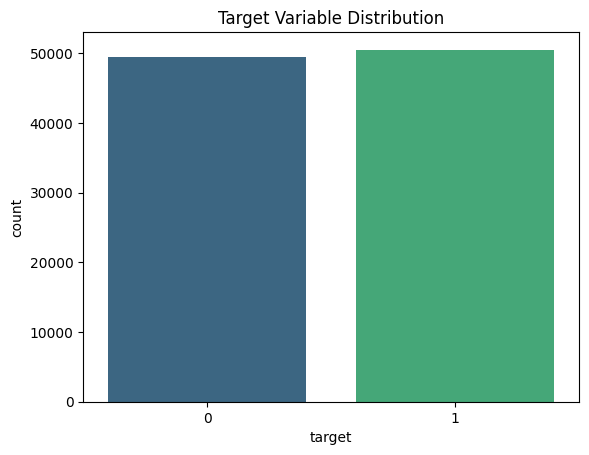

In [13]:
#Target Distribution Map

sns.countplot(x=df_train['target'], palette='viridis')
plt.title('Target Variable Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


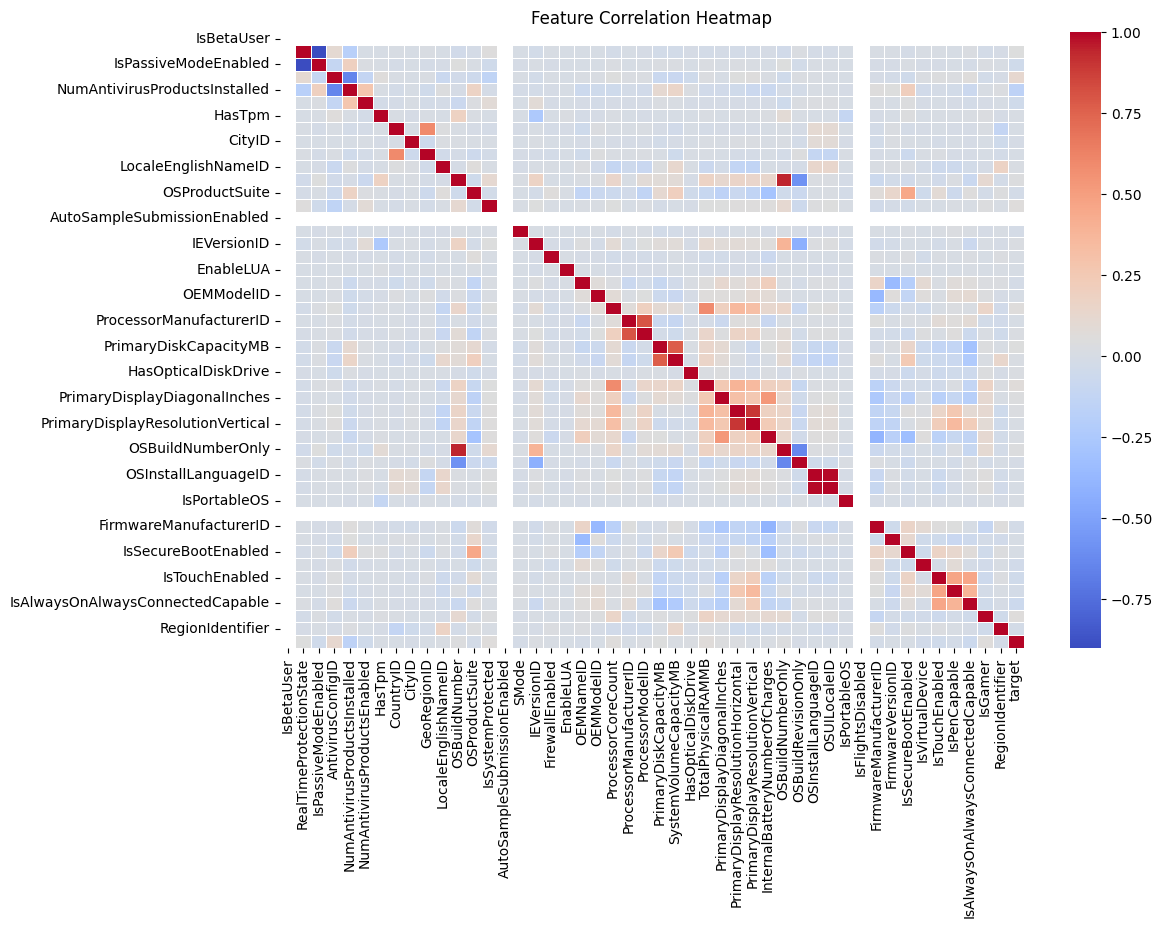

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(num_train_.corr(numeric_only=True), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

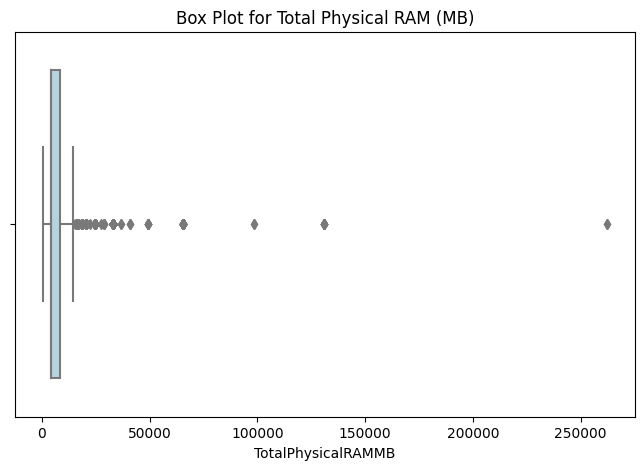

In [15]:
# Box Plot for Total Physical RAM
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['TotalPhysicalRAMMB'], color='lightblue')
plt.title('Box Plot for Total Physical RAM (MB)')
plt.show()


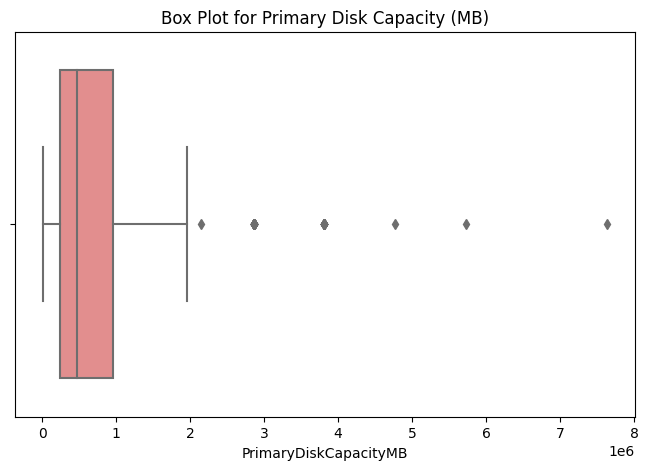

In [16]:
# Box Plot for Primary Disk Capacity
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['PrimaryDiskCapacityMB'], color='lightcoral')
plt.title('Box Plot for Primary Disk Capacity (MB)')
plt.show()


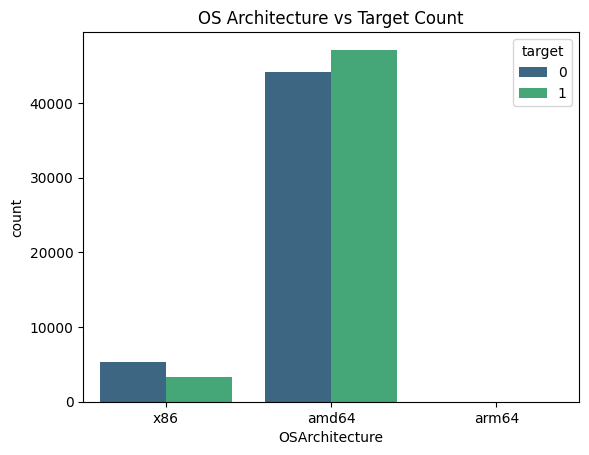

In [17]:
sns.countplot(x=df_train['OSArchitecture'], hue=df_train['target'], palette='viridis')
plt.title('OS Architecture vs Target Count')
plt.show()

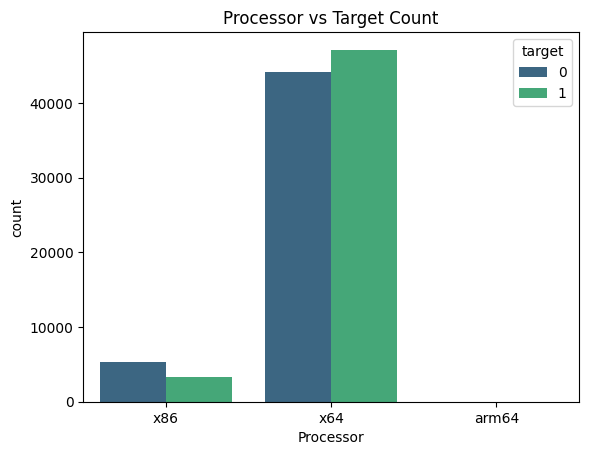

In [18]:
sns.countplot(x=df_train['Processor'], hue=df_train['target'], palette='viridis')
plt.title('Processor vs Target Count')
plt.show()

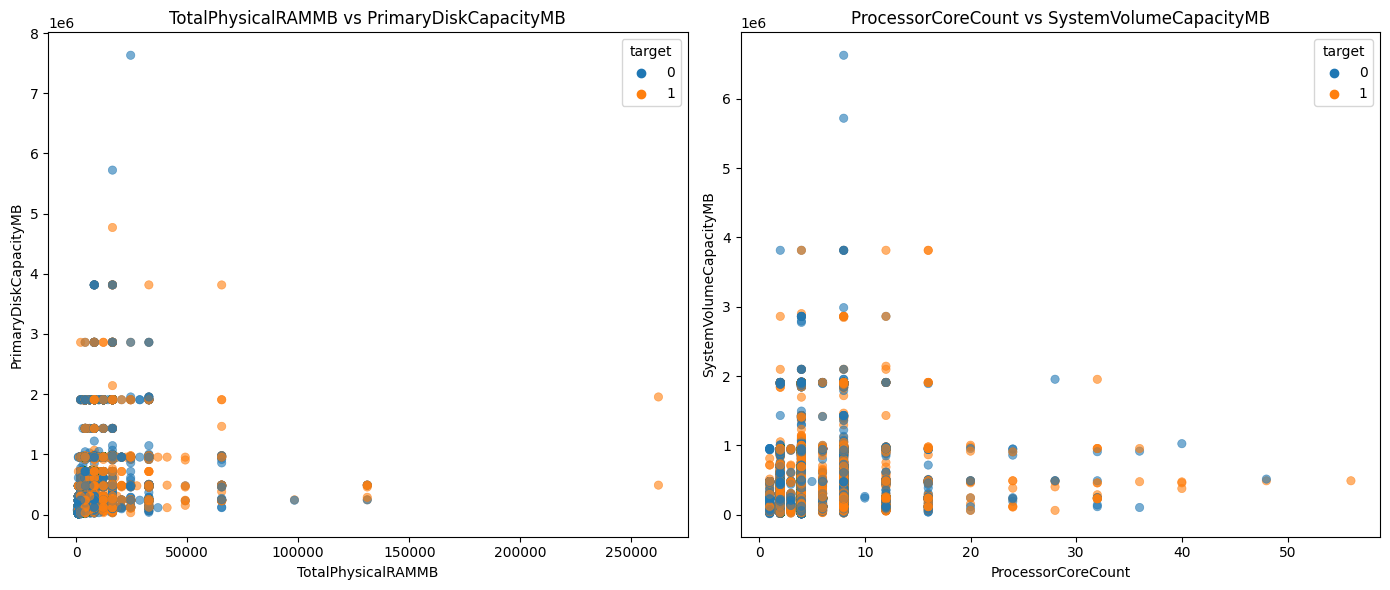

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to compare
x1 = 'TotalPhysicalRAMMB'
y1 = 'PrimaryDiskCapacityMB'
x2 = 'ProcessorCoreCount'
y2 = 'SystemVolumeCapacityMB'

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First scatter plot
sns.scatterplot(x=df_train[x1], y=df_train[y1], hue=df_train['target'], alpha=0.6, ax=axes[0], edgecolor=None)
axes[0].set_title(f'{x1} vs {y1}')
axes[0].set_xlabel(x1)
axes[0].set_ylabel(y1)

# Second scatter plot
sns.scatterplot(x=df_train[x2], y=df_train[y2], hue=df_train['target'], alpha=0.6, ax=axes[1], edgecolor=None)
axes[1].set_title(f'{x2} vs {y2}')
axes[1].set_xlabel(x2)
axes[1].set_ylabel(y2)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


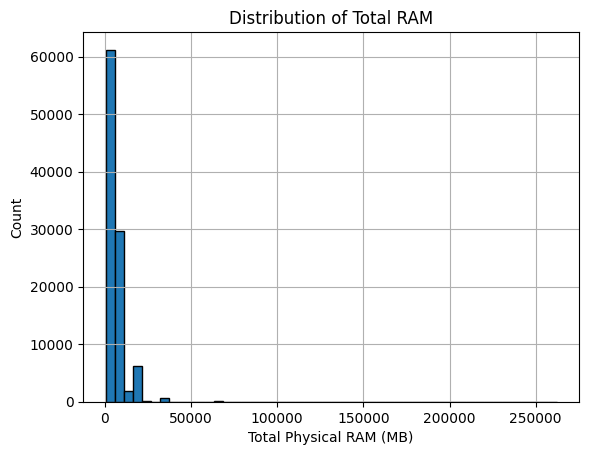

In [20]:
import matplotlib.pyplot as plt

df_train['TotalPhysicalRAMMB'].hist(bins=50, edgecolor='black')
plt.xlabel('Total Physical RAM (MB)')
plt.ylabel('Count')
plt.title('Distribution of Total RAM')
plt.show()


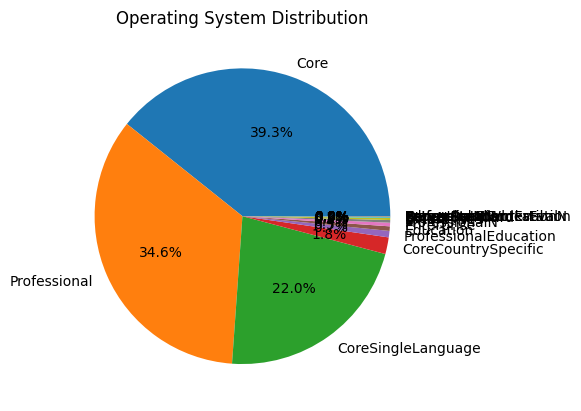

In [21]:
df_train['OSEdition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()


# Feature Engineering

In [22]:
def feature_engineering(df):
    df['DateOS'] = pd.to_datetime(df['DateOS'], errors='coerce')
    df['DateAS'] = pd.to_datetime(df['DateAS'], errors='coerce')
    df['OSAge'] = (df['DateAS'] - df['DateOS']).dt.days
    df['Security_Coverage'] = df['NumAntivirusProductsEnabled'] / df['NumAntivirusProductsInstalled']
    df['Firewall_Protection'] = df['FirewallEnabled'].fillna(0).astype(int)
    df['RAM_Disk_Ratio'] = df['TotalPhysicalRAMMB'] / df['PrimaryDiskCapacityMB']
    df.replace([np.inf, -np.inf], np.nan, inplace=True) 
    return df


df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)


In [23]:
df_train['EnableLUA'].value_counts()

EnableLUA
1.0     99494
0.0       484
48.0        3
Name: count, dtype: int64

In [24]:
#Replacing 48 with mode 

mode_value = df_train['EnableLUA'].mode()[0]
df_train['EnableLUA'].replace(48.0, mode_value, inplace=True)
df_test['EnableLUA'].replace(48.0, mode_value, inplace=True)


<ipython-input-24-b7538db5d6dd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['EnableLUA'].replace(48.0, mode_value, inplace=True)
<ipython-input-24-b7538db5d6dd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [25]:
df_train['EnableLUA'].value_counts()

EnableLUA
1.0    99497
0.0      484
Name: count, dtype: int64

In [26]:
df_train.head()

,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target,OSAge,Security_Coverage,Firewall_Protection,RAM_Disk_Ratio
0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0,146.0,1.0,1,0.068139
1,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1,2.0,1.0,1,0.004294
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1,9.0,1.0,1,0.035783
3,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1,254.0,0.5,1,0.004294
4,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-

In [27]:
df_train['OSReleaseStage'] = df_train['OSBranch'].apply(lambda x: x.split('_')[0] if isinstance(x, str) else np.nan)
df_test['OSReleaseStage'] = df_test['OSBranch'].apply(lambda x: x.split('_')[0] if isinstance(x, str) else np.nan)

df_train.drop(columns=['OSBranch'], inplace=True)
df_test.drop(columns=['OSBranch'], inplace=True)

In [28]:
device_map = {
    'Windows.Desktop': 'Desktop',
    'Windows.Server': 'Server'}

df_train['DeviceType'] = df_train['DeviceFamily'].map(device_map)
df_test['DeviceType'] = df_test['DeviceFamily'].map(device_map)

df_train.drop(columns=['DeviceFamily'], inplace=True)
df_test.drop(columns=['DeviceFamily'], inplace=True)

In [29]:
def clean_license_activation(df):
    rare_categories = ['Retail:TB:Eval', 'Volume:MAK', 'OEM:NONSLP']

    df['LicenseActivationChannel'] = df['LicenseActivationChannel'].replace(rare_categories, 'Other')
    return df

df_train = clean_license_activation(df_train)
df_test = clean_license_activation(df_test)

In [30]:
#as OSBuildNumber already explains this

df_train.drop(columns=['OSBuildLab'], inplace=True)
df_test.drop(columns=['OSBuildLab'], inplace=True)


In [31]:
#As OS Age is already calculated
df_train = df_train.drop(columns=['DateAS', 'DateOS'])
df_test = df_test.drop(columns=['DateAS', 'DateOS'])

In [32]:
# Extracting major and minor version components
def extract_version_features(df, col):
    df[f'{col}_Major'] = df[col].apply(lambda x: int(x.split('.')[0]) if isinstance(x, str) else np.nan)
    df[f'{col}_Minor'] = df[col].apply(lambda x: int(x.split('.')[1]) if isinstance(x, str) else np.nan)
    df.drop(columns=[col], inplace=True)
    return df

for col in ['AppVersion', 'SignatureVersion']:
    df_train = extract_version_features(df_train, col)
    df_test = extract_version_features(df_test, col)

def extract_version_features_(df, col):
    df[f'{col}_Major'] = df[col].apply(lambda x: int(x.split('.')[2]) if isinstance(x, str) else np.nan)
    df[f'{col}_Minor'] = df[col].apply(lambda x: int(x.split('.')[3]) if isinstance(x, str) else np.nan)
    df.drop(columns=[col], inplace=True)
    return df

for col in ['EngineVersion', 'NumericOSVersion']:
    df_train = extract_version_features_(df_train, col)
    df_test = extract_version_features_(df_test, col)


**Reduntant column Removal and Outlier Removal**

In [33]:
num_train = df_train.select_dtypes(include=['int64','float64'])
num_train = num_train.drop(columns=['target'])
cat_train = df_train.select_dtypes(include=['object'])

num_test = df_test.select_dtypes(include=['int64','float64'])
cat_test = df_test.select_dtypes(include=['object'])

In [34]:
constant_cols = [col for col in df_train.columns if df_train[col].nunique() == 1]
df_train.drop(constant_cols, axis=1, inplace=True)
df_test.drop(constant_cols, axis=1, inplace=True)

In [35]:
constant_cols

['IsBetaUser',
 'AutoSampleSubmissionEnabled',
 'IsFlightsDisabled',
 'AppVersion_Major',
 'SignatureVersion_Major']

In [36]:
#Outlier Removal

#Continuous numerical variables are choosen

iqr_features = [
    'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches',
                'ProcessorCoreCount', 'PrimaryDisplayResolutionHorizontal'
]

# IQR
def remove_outliers_iqr(df_train, column):
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]

for col in iqr_features:
    df_train = remove_outliers_iqr(df_train, col)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [37]:
#Removing redundant features 

threshold = 0.8
correlation_matrix = num_train.corr()
# Find correlated features
correlated_pairs = []
correlated_features = set()


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2))
            correlated_features.add(colname1)  # Remove only one from each pair


# Display correlated pairs before dropping
print("Correlated Feature Pairs:")
for pair in correlated_pairs:
    print(pair)


# Drop correlated features
df_train = df_train.drop(columns=correlated_features)
df_test = df_test.drop(columns=correlated_features)

#columns that are removed
print(correlated_features)

Correlated Feature Pairs:
('IsPassiveModeEnabled', 'RealTimeProtectionState')
('ProcessorModelID', 'ProcessorManufacturerID')
('PrimaryDisplayResolutionVertical', 'PrimaryDisplayResolutionHorizontal')
('OSBuildNumberOnly', 'OSBuildNumber')
('OSUILocaleID', 'OSInstallLanguageID')
('Security_Coverage', 'NumAntivirusProductsInstalled')
('Firewall_Protection', 'FirewallEnabled')
('EngineVersion_Major', 'SignatureVersion_Minor')
('NumericOSVersion_Major', 'OSBuildNumber')
('NumericOSVersion_Major', 'OSBuildNumberOnly')
('NumericOSVersion_Minor', 'OSBuildRevisionOnly')
{'ProcessorModelID', 'NumericOSVersion_Major', 'Security_Coverage', 'Firewall_Protection', 'IsPassiveModeEnabled', 'NumericOSVersion_Minor', 'EngineVersion_Major', 'OSUILocaleID', 'OSBuildNumberOnly', 'PrimaryDisplayResolutionVertical'}


# Preprocessing and Scaling

In [38]:
X_train = df_train.drop(columns=['target'])
X_test = df_test
y_train = df_train['target']

In [39]:
X_train.columns

Index(['ProductName', 'RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'SKUEditionName',
       'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled',
       'EnableLUA', 'MDC2FormFactor', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PowerPlatformRole', 'InternalBatteryNumberOfCharges', 'OSArchitecture',
       'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName',
       'OSInstallType', 'OSInstallLanguageID', 'AutoUpdateOptionsName',
       'IsPortableO

In [40]:
X_train.shape

(95565, 64)

In [41]:
X_test.shape

(10000, 64)

In [42]:
y_train.shape

(95565,)

In [43]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# === Feature Categories ===
numerical_features = [
    'RealTimeProtectionState', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
    'SMode', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
    'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildRevisionOnly',
    'OSAge', 'RAM_Disk_Ratio'
]

categorical_features = [
    'ProductName', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease',
    'SKUEditionName', 'MDC2FormFactor', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole',
    'OSArchitecture', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName',
    'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'OSReleaseStage', 'DeviceType'
]

id_like_categoricals = [
    'CountryID', 'CityID', 'AntivirusConfigID', 'LocaleEnglishNameID', 'OEMNameID', 'OEMModelID',
    'ProcessorManufacturerID', 'ProcessorModelID', 'FirmwareManufacturerID', 'FirmwareVersionID',
    'OSInstallLanguageID', 'IEVersionID', 'RegionIdentifier'
]

binary_features = [
    'HasTpm', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled',
    'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable',
    'IsVirtualDevice', 'IsGamer', 'IsSystemProtected', 'EnableLUA',
    'FirewallEnabled'
]

# === Remove Unwanted Features ===
excluded_features = {
    'OSUILocaleID', 'NumericOSVersion_Minor', 'EngineVersion_Major', 'IsPassiveModeEnabled', 
    'OSBuildNumberOnly', 'Firewall_Protection', 'NumericOSVersion_Major', 'ProcessorModelID', 
    'PrimaryDisplayResolutionVertical', 'Security_Coverage'
}

numerical_features = [col for col in numerical_features if col not in excluded_features]
categorical_features = [col for col in categorical_features if col not in excluded_features]
id_like_categoricals = [col for col in id_like_categoricals if col not in excluded_features]
binary_features = [col for col in binary_features if col not in excluded_features]



In [44]:
# Filter Only Existing Columns
valid_categoricals = [col for col in categorical_features + id_like_categoricals if col in X_train.columns]

# Check the number of unique values in each categorical feature
unique_counts = X_train[valid_categoricals].nunique()

# Low-cardinality categorical features (for One-Hot Encoding)
low_card_categoricals = unique_counts[unique_counts <= 10].index.tolist()

# High-cardinality categorical features (for Frequency Encoding)
high_card_categoricals = unique_counts[unique_counts > 10].index.tolist()

# Ensure features exist in the dataset
low_card_categoricals = [col for col in low_card_categoricals if col in X_train.columns]
high_card_categoricals = [col for col in high_card_categoricals if col in X_train.columns]



In [45]:
# === Impute Missing Values in High-Cardinality Categoricals ===
for col in high_card_categoricals:
    if col in X_train:
        most_frequent = X_train[col].mode()[0]  # Get most frequent value
        X_train[col].fillna(most_frequent, inplace=True)
        X_test[col].fillna(most_frequent, inplace=True)

# === Frequency Encoding for High-Cardinality Categoricals ===
freq_maps = {}
for col in high_card_categoricals:
    if col in X_train:
        freq_map = X_train[col].value_counts(normalize=True)
        freq_maps[col] = freq_map
        X_train[col] = X_train[col].map(freq_map).fillna(0)  
        X_test[col] = X_test[col].map(freq_map).fillna(0)  



<ipython-input-45-42f8a47460d1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(most_frequent, inplace=True)
<ipython-input-45-42f8a47460d1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [46]:
# === Pipelines for Feature Transformation ===
# Numerical Features: Median Imputation + Robust Scaling
numerical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])

# Binary Features: Mode Imputation (since binary values are categorical)
binary_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent'))
])

# Low-Cardinality Categorical Features: Mode Imputation + One-Hot Encoding
low_card_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# === Column Transformer ===
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('low_card', low_card_pipeline, low_card_categoricals),
    ('binary', binary_pipeline, binary_features)
], remainder='passthrough')


X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)


X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

#  Check for Missing Values
print("Nulls in X_train_transformed_df:", X_train_transformed_df.isna().sum().sum())
print("Nulls in X_test_transformed_df:", X_test_transformed_df.isna().sum().sum())


print("Original X_train shape:", X_train.shape)
print("Transformed X_train shape:", X_train_transformed_df.shape)

Nulls in X_train_transformed_df: 0
Nulls in X_test_transformed_df: 1
Original X_train shape: (95565, 64)
Transformed X_train shape: (95565, 148)


In [47]:
# Find the column with NaN
nan_column = X_test_transformed_df.columns[X_test_transformed_df.isna().sum() > 0][0]

# Replace NaN with the mean of the column from X_train_transformed_df
X_test_transformed_df[nan_column].fillna(X_train_transformed_df[nan_column].mean(), inplace=True)

# Verify that no NaNs remain
print("Nulls in X_test_transformed_df after fix:", X_test_transformed_df.isna().sum().sum())  # Should print 0


Nulls in X_test_transformed_df after fix: 0


<ipython-input-47-aa284e67d551>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_transformed_df[nan_column].fillna(X_train_transformed_df[nan_column].mean(), inplace=True)


In [48]:
X_test_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 148 entries, 0 to 147
dtypes: float64(148)
memory usage: 11.3 MB


In [49]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: target, dtype: int64

In [50]:
print("Missing values in y_train:", y_train.isna().sum())


Missing values in y_train: 0


# Model Selection

In [51]:
from sklearn.model_selection import train_test_split

# Split the transformed training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_transformed_df, y_train, test_size=0.2, random_state=42, stratify=y_train
)


In [52]:
#light BGM model

import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV


train_data = lgb.Dataset(X_train_final, label=y_train_final)
test_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

lgb_model = lgb.LGBMClassifier()

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define the best LightGBM model
lgbm_model = LGBMClassifier(
    colsample_bytree=0.7,
    learning_rate=0.07444444444444444,
    max_depth=13,
    n_estimators=350,
    num_leaves=30,
    reg_alpha=0.1,
    reg_lambda=10.0,
    random_state=42
)

# Train the model
lgbm_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = lgbm_model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"LightGBM Model Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 38488, number of negative: 37964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3379
[LightGBM] [Info] Number of data points in the train set: 76452, number of used features: 131
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503427 -> initscore=0.013708
[LightGBM] [Info] Start training from score 0.013708
LightGBM Model Accuracy: 0.6309


XGBooster

In [53]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [3, 5, 7, 10],  # Tree depth
    'learning_rate': np.linspace(0.01, 0.3, 5),  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Fraction of data used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction
    'reg_lambda': [0, 1, 10],  # L2 regularization
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    n_iter=15,
    param_distributions=param_dist,  # Number of random samples to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Show progress
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    error_score='raise'
)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_final, y_train_final)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on validation data
y_pred = best_xgb.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Best XGBoost Model Accuracy: {accuracy:.4f}")

# Show the best parameters found
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best XGBoost Model Accuracy: 0.6247
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 10, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.08249999999999999, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the best XGBoost model
xgb_model = XGBClassifier(
    subsample=0.8,
    reg_lambda=10,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.0825,
    gamma=0.2,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = xgb_model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")


XGBoost Model Accuracy: 0.6247


Stacking Model 

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define the best XGBoost model
xgb_model = XGBClassifier(
    subsample=0.8,
    reg_lambda=10,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.0825,
    gamma=0.2,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define the best LightGBM model
lgbm_model = LGBMClassifier(
    colsample_bytree=0.7,
    learning_rate=0.0744,
    max_depth=13,
    n_estimators=350,
    num_leaves=30,
    reg_alpha=0.1,
    reg_lambda=10.0,
    random_state=42
)

# Define the stacking classifier with Logistic Regression as the final model
stack_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Train the stacking model
stack_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred = stack_model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Stacking Model Accuracy: {accuracy:.4f}")


Stacking Model Accuracy: 0.6292


In [56]:
y_pred_final = stack_model.predict(X_test_transformed_df)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': range(len(y_pred_final)), 
    'target': y_pred_final
})

# Save submission
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' saved successfully!")


Submission file 'submission.csv' saved successfully!


In [57]:
submission['target'].value_counts()

target
1    5419
0    4581
Name: count, dtype: int64